# Week5 - Learn geopandas by plotting tornados on a map

In this tutorial we will take a look at the powerful *geopandas* library and use it to plot historical tornado data on a map of the United States.

### Here are the commands you will need to run if have not already install geopandas
#### Prerequisites 
```
conda install geopandas
conda install -c conda-forge descartes
conda update geopandas

or try
pip install geopandas
pip install --upgrade geopandas
pip install --upgrade fiona

```

The data we will be working with comes from the US Census and is in a common shapefile format.

In [387]:
ls -al data

 Volume in drive C has no label.
 Volume Serial Number is 96C0-83C4

 Directory of C:\Users\xboxl\cs445\quiz_5_3


 Directory of C:\Users\xboxl\cs445\quiz_5_3\data

05/01/2025  11:52 PM    <DIR>          .
05/01/2025  11:52 PM    <DIR>          ..
05/01/2025  11:52 PM         3,929,143 1950-2018-torn-aspath.zip
05/01/2025  11:52 PM         3,191,635 1950-2018-torn-initpoint.zip
05/01/2025  11:52 PM                 5 usa-states-census-2014.cpg
05/01/2025  11:52 PM            15,201 usa-states-census-2014.dbf
05/01/2025  11:52 PM               143 usa-states-census-2014.prj
05/01/2025  11:52 PM               257 usa-states-census-2014.qpj
05/01/2025  11:52 PM           309,672 usa-states-census-2014.shp
05/01/2025  11:52 PM            18,517 usa-states-census-2014.shp.xml
05/01/2025  11:52 PM               564 usa-states-census-2014.shx
               9 File(s)      7,465,137 bytes
               2 Dir(s)  153,044,131,840 bytes free


File Not Found


### Import geopandas and load the U.S. map shapefile

In [389]:
%matplotlib inline

In [390]:
import matplotlib.pyplot as plt
import geopandas

states = geopandas.read_file('data/usa-states-census-2014.shp')

In [391]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.4672 0, -118.4..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0, -77.04102 38..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0, -81.75..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0, -85.47434 34..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0, -117.21507 ..."


### Reproject coordinates

By default this shp file is in WGS 84.

In [394]:
states.crs #Coordinate Reference System

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

To make the map look a little more familiar lets reproject it's coordinates to **Mercator**.

geopandas requires we know the geospatial reference system identifier so here is a list of common ones.

* **"EPSG:4326"** WGS84 Latitude/Longitude, used in GPS
* **"EPSG:3395"** Spherical Mercator. Google Maps, OpenStreetMap, Bing Maps
* **"EPSG:32633"** UTM Zones (North) - (Universal Transverse Mercator)
* **"EPSG:32733"** UTM Zones (South) - (Universal Transverse Mercator)

In [396]:
states = states.to_crs("EPSG:3395")

Now lets plot the U.S. map and see what we get

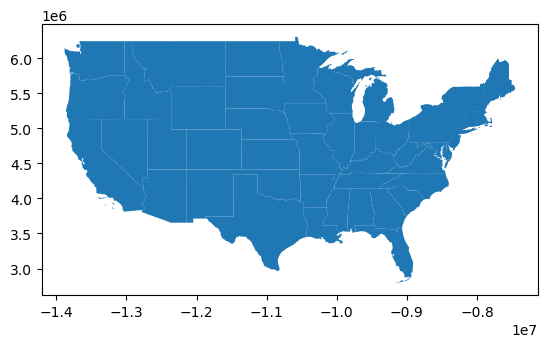

In [398]:
states.plot()

plt.show()

We can also plot the state polygons with no fill color by using boundary

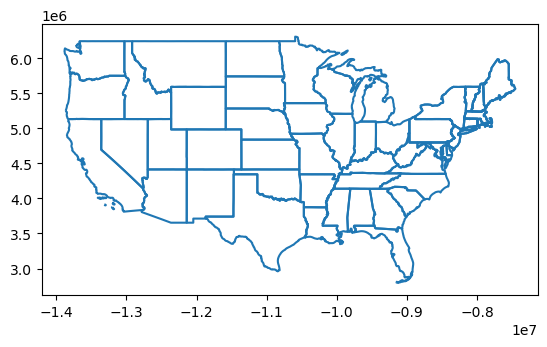

In [400]:
states.boundary.plot()

plt.show()

In [401]:
west = states[states['region'] == 'West']
west

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-13201820.24 3933920.113 0, ..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-13051434.065 5496245.142 0, -1304..."
14,41,01155107,0400000US41,41,OR,Oregon,00,248608666869,6190902750,West,"POLYGON Z ((-13865114.309 5258673.324 0, -1385..."
21,08,01779779,0400000US08,08,CO,Colorado,00,268426928342,1176085119,West,"POLYGON Z ((-12140499.436 4623697.048 0, -1214..."
31,30,00767982,0400000US30,30,MT,Montana,00,376963849026,3867840830,West,"POLYGON Z ((-12918537.072 6242750.301 0, -1285..."
35,49,01455989,0400000US49,49,UT,Utah,00,212883424892,7000211755,West,"POLYGON Z ((-12696263.107 4497667.106 0, -1269..."
36,53,01779804,0400000US53,53,WA,Washington,00,172120795268,12540315747,West,"MULTIPOLYGON Z (((-13718696.562 6189212.318 0,..."
38,56,01779807,0400000US56,56,WY,Wyoming,00,251471960305,1862600347,West,"POLYGON Z ((-12362796.221 5570398.901 0, -1236..."
46,32,01779793,0400000US32,32,NV,Nevada,00,284331571298,2049092975,West,"POLYGON Z ((-13358872.729 4740028.157 0, -1335..."


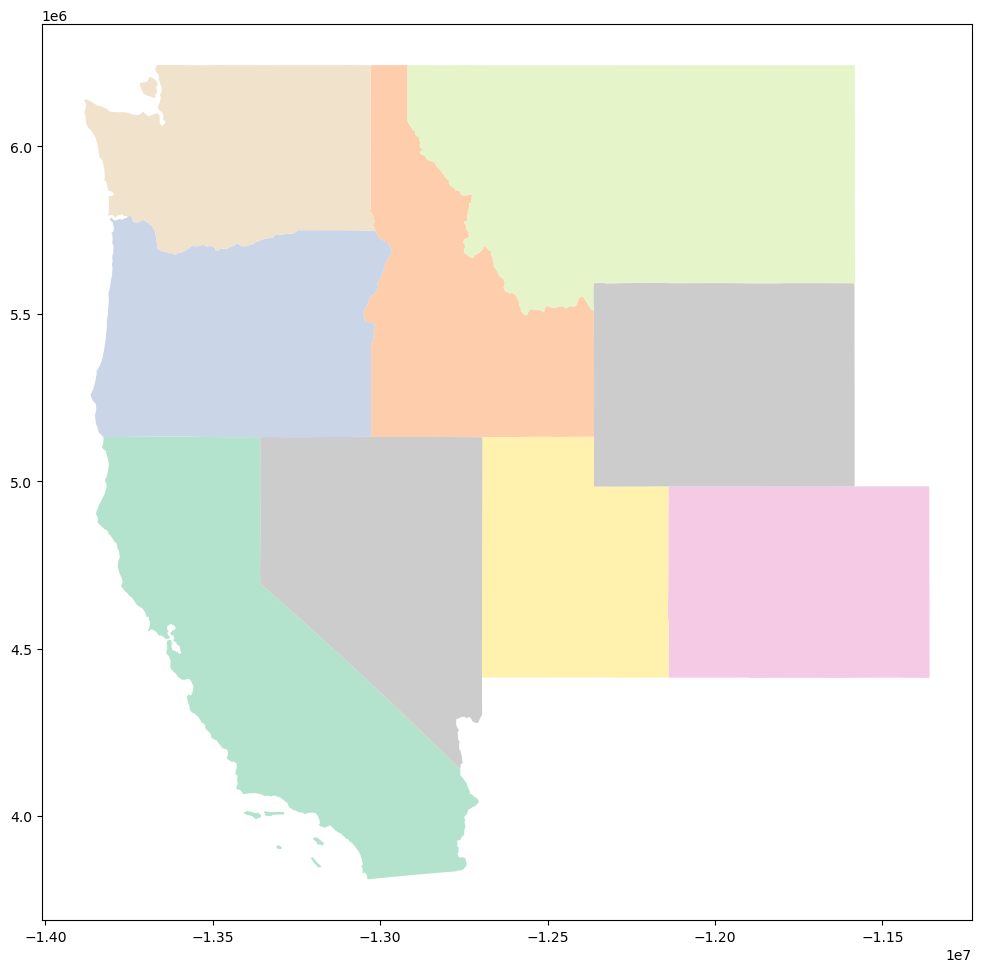

In [402]:
west = states[states['region'] == 'West']

west.plot(cmap='Pastel2', figsize=(12, 12))

plt.show()

### Add outlines and labels to each State

Here is another plot of the U.S West but this time we are going to use a lambda function to plot the state name over each state.  We also plotting the state shapes with a black outline.

As a bonus code snippet,  I have added a vertical watermark to the left side of the image.

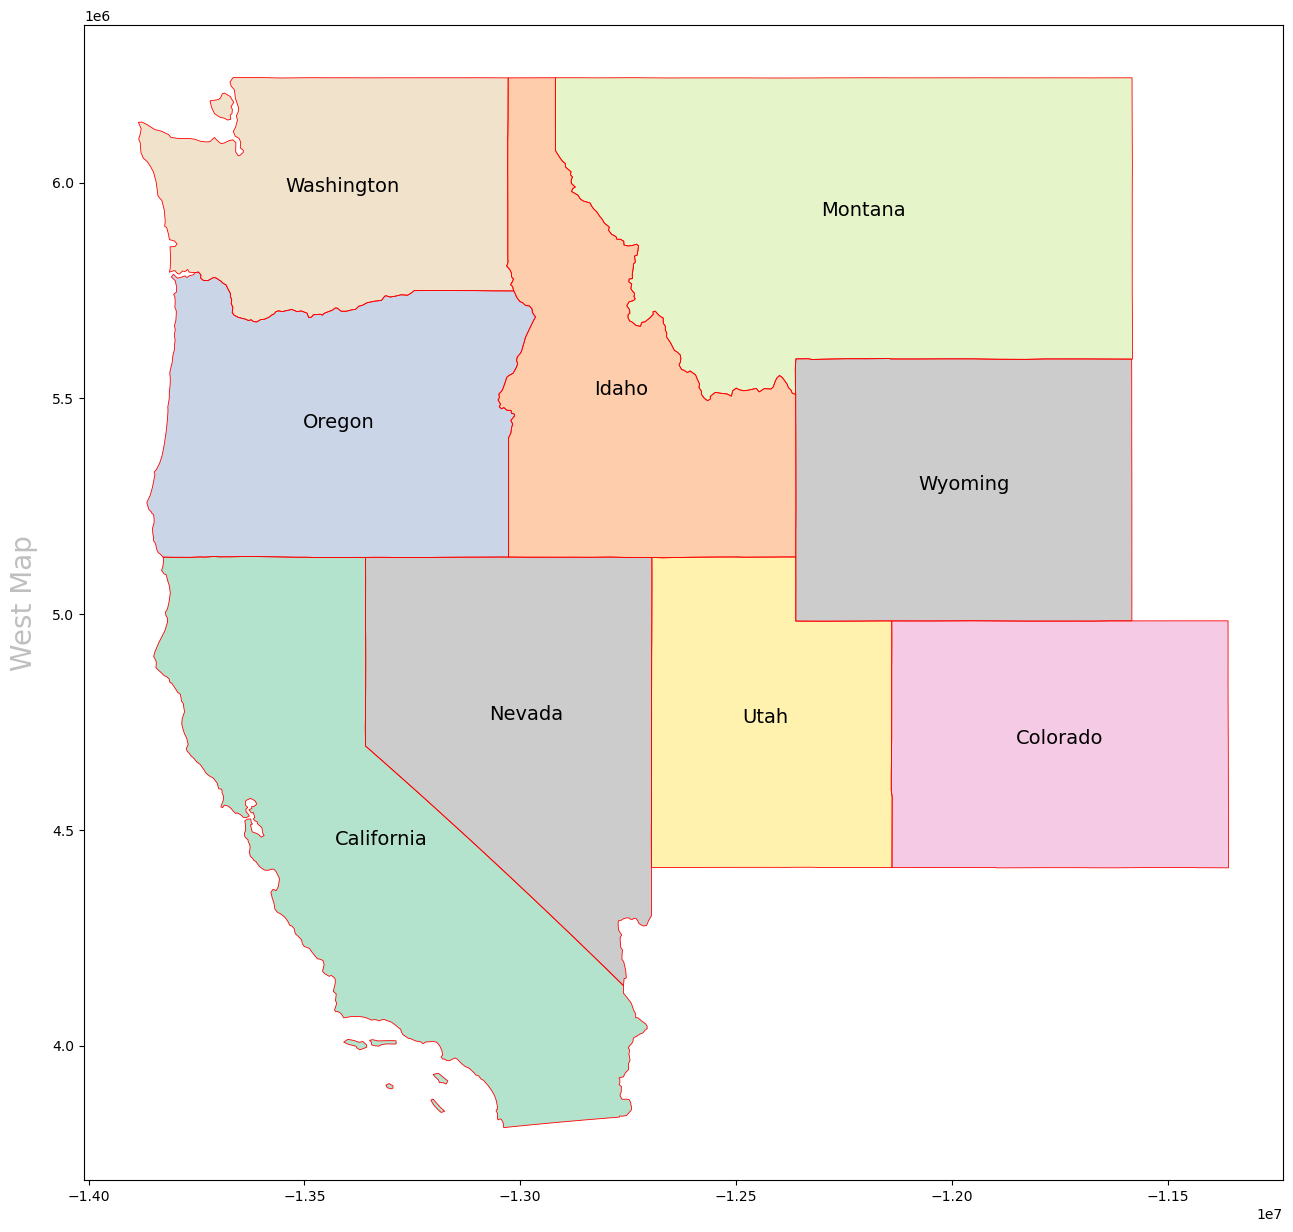

In [404]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

west.apply(lambda x: ax.annotate(x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14), axis=1)

west.boundary.plot(ax=ax, color='Red', linewidth=.6)

west.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

ax.text(-0.05, 0.5, 'West Map', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation=90)

plt.show()

### Load the NOAA US tornado dataset 

Source: https://www.spc.noaa.gov/gis/svrgis/

One of the cool features of geopandas is that you can load a shapefile directly from a zip archive without first unzipping it.  The file path to open a zipped shapefile is prefixed with `zip://`

However, there is a caveat.  If the zip archive contains a subfolder you must specify it by appending `!foldername` to the path.

In [407]:
ls -al  data

 Volume in drive C has no label.

File Not Found



 Volume Serial Number is 96C0-83C4

 Directory of C:\Users\xboxl\cs445\quiz_5_3


 Directory of C:\Users\xboxl\cs445\quiz_5_3\data

05/01/2025  11:52 PM    <DIR>          .
05/01/2025  11:52 PM    <DIR>          ..
05/01/2025  11:52 PM         3,929,143 1950-2018-torn-aspath.zip
05/01/2025  11:52 PM         3,191,635 1950-2018-torn-initpoint.zip
05/01/2025  11:52 PM                 5 usa-states-census-2014.cpg
05/01/2025  11:52 PM            15,201 usa-states-census-2014.dbf
05/01/2025  11:52 PM               143 usa-states-census-2014.prj
05/01/2025  11:52 PM               257 usa-states-census-2014.qpj
05/01/2025  11:52 PM           309,672 usa-states-census-2014.shp
05/01/2025  11:52 PM            18,517 usa-states-census-2014.shp.xml
05/01/2025  11:52 PM               564 usa-states-census-2014.shx
               9 File(s)      7,465,137 bytes
               2 Dir(s)  153,043,968,000 bytes free


### Load the shapefile from zip archive

We will use the above mentioned technique to load the `1950-2018-torn-initpoint.shp` shapefile from the zip archive.

In [410]:
tornados = geopandas.read_file('zip://data/1950-2018-torn-initpoint.zip!1950-2018-torn-initpoint')

<font color="green">
Note: If loading from inside a zip file confuses you don't let is slow you down, just unzip the archive.
</font>

Lets have a look at the DataFrame

In [413]:
tornados.shape

(63645, 23)

In [414]:
tornados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63645 entries, 0 to 63644
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   om        63645 non-null  int64   
 1   yr        63645 non-null  int64   
 2   mo        63645 non-null  int64   
 3   dy        63645 non-null  int64   
 4   date      63645 non-null  object  
 5   time      63645 non-null  object  
 6   tz        63645 non-null  int64   
 7   st        63645 non-null  object  
 8   stf       63645 non-null  int64   
 9   stn       63645 non-null  int64   
 10  mag       63645 non-null  int64   
 11  inj       63645 non-null  int64   
 12  fat       63645 non-null  int64   
 13  loss      63645 non-null  float64 
 14  closs     63645 non-null  float64 
 15  slat      63645 non-null  float64 
 16  slon      63645 non-null  float64 
 17  elat      63645 non-null  float64 
 18  elon      63645 non-null  float64 
 19  len       63645 non-null  float64 
 20

In [415]:
tornados.head(10)

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.0,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,POINT (-90.22 38.77)
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,5.0,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,POINT (-89.3 39.1)
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,4.0,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,POINT (-84.58 40.88)
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,3.0,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,POINT (-94.37 34.4)
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,5.0,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,POINT (-90.68 37.6)
5,6,1950,1,25,1950-01-25,21:00:00,3,IL,17,3,...,5.0,0.0,41.17,-87.33,41.1701,-87.3299,0.1,100,0,POINT (-87.33 41.17)
6,7,1950,1,26,1950-01-26,18:00:00,3,TX,48,1,...,0.0,0.0,26.88,-98.12,26.8800,-98.0500,4.7,133,0,POINT (-98.12 26.88)
7,8,1950,2,11,1950-02-11,13:10:00,3,TX,48,2,...,4.0,0.0,29.42,-95.25,29.5200,-95.1300,9.9,400,0,POINT (-95.25 29.42)
8,9,1950,2,11,1950-02-11,13:50:00,3,TX,48,3,...,4.0,0.0,29.67,-95.05,29.8300,-95.0000,12.0,1000,0,POINT (-95.05 29.67)
9,10,1950,2,11,1950-02-11,21:00:00,3,TX,48,4,...,5.0,0.0,32.35,-95.20,32.4200,-95.2000,4.6,100,0,POINT (-95.2 32.35)


#### Reproject coordinates

We will also need to reproject it's coordinates to **Mercator** so that our maps line up.

In [418]:
tornados = tornados.to_crs("EPSG:3395")

Take note how reprojecting our coordinates to Mercator moves the decimal point in our lat, long data.  This will come into play later.

In [420]:
tornados[:1].geometry

0    POINT (-10043244.459 4662018.86)
Name: geometry, dtype: geometry

### Our first plot of U.S. tornado data

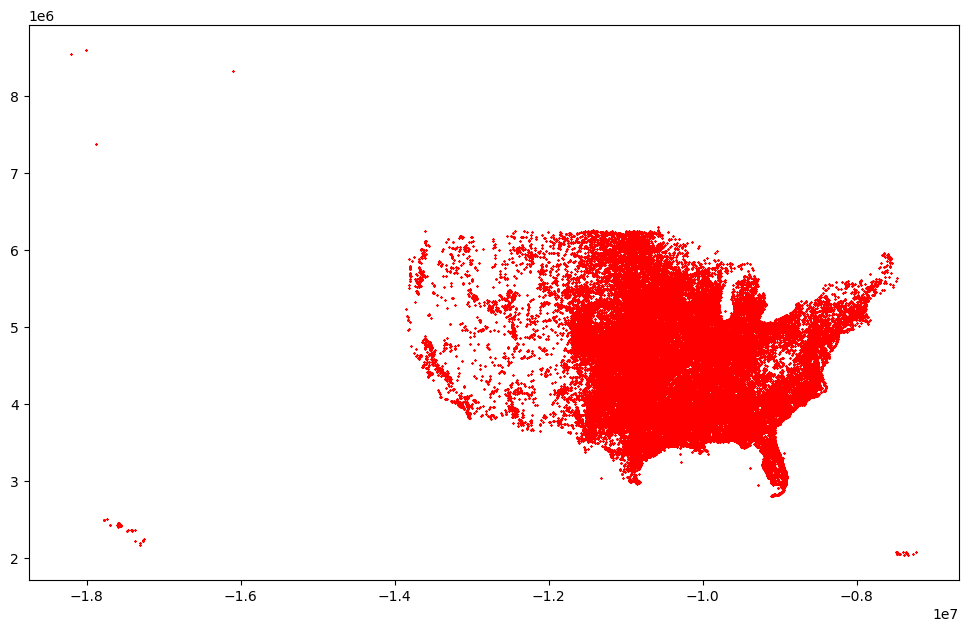

In [422]:
tornados.plot( figsize=(12,9), color='red', marker='x', markersize=1)

plt.show()

### Now lets plot the tornados data on top of the U.S. basemap

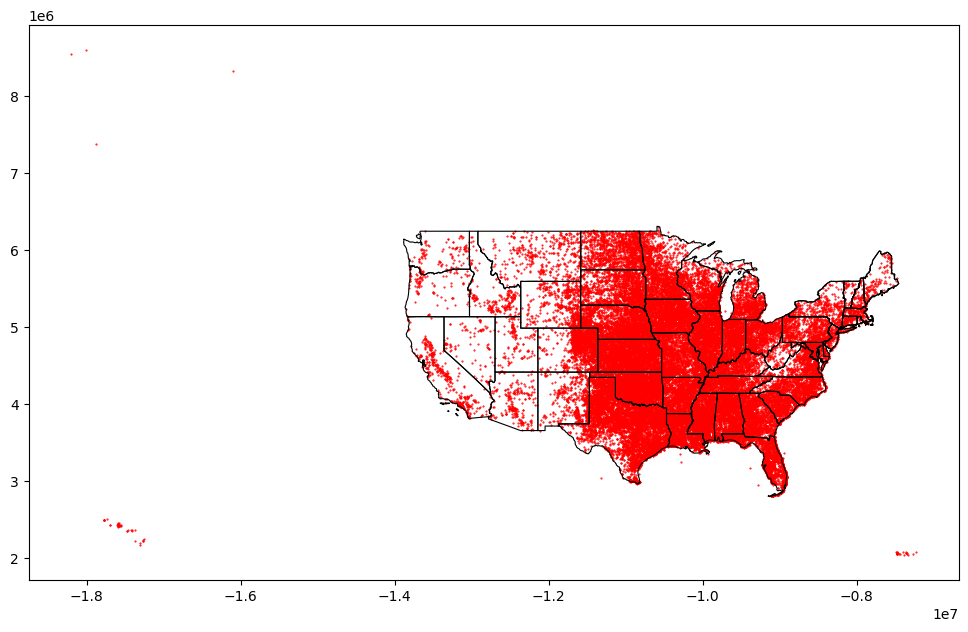

In [424]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()
states.boundary.plot(ax=ax, color='black', linewidth=.8)

tornados.plot(ax=ax, color='red', marker='.', markersize=1)

plt.show()

### Great!

We even chose an ominous red v-shaped marker to represent the tornados.  The two maps line up perfectly but it looks like we have some outliers data for Hawaii, Alaska, and Puerto Rico that are stretching out our map canvas.

We want to focus on the lower 48 states so now we need to narrow down our view.  We can accomplish this in a couple of ways. One way is to remove any tornados from our dataframe that are not in the lower 48.  Another approach is to simply limit the viewport area of the map with `ax.set_xlim()` and `ax.set_ylim()`.

Our first thought might be to pass in typical lat,long data such as `ax.set_xlim(-101.12345, 72.12345)`.  After we reprojected our maps to Mercator our coordinates data now look like this `ax.set_xlim(-10112345, 7212345)`.

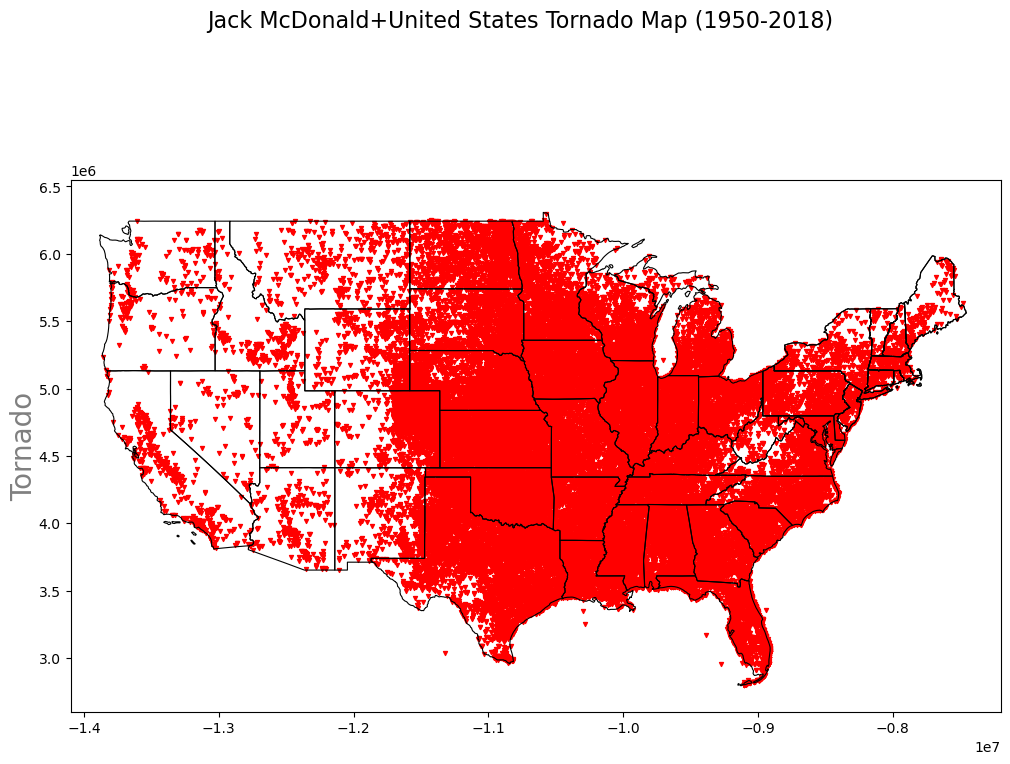

In [426]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)

fig.suptitle('Jack McDonald+United States Tornado Map (1950-2018)', fontsize=16)

states.boundary.plot(ax=ax, color='black', linewidth=.8)

tornados.plot(ax=ax, color='red', marker='v', markersize=8)
ax.text(-0.05, 0.5, 'Tornado', transform=ax.transAxes,
        fontsize=20, color='black', alpha=0.5,
        ha='center', va='center', rotation=90)

plt.show()

Hey! That was a success, now let's press on.

### Get total tornados by State

I already know the answer to this question (because its my home) but...

Which state do you think has had the most tornados?

> *Hint: In Texas we call them twisters*

In [430]:
# Create a copy of the original DataFrame
twisters_by_state = tornados.copy()
# Add a new column and set the value to 1
twisters_by_state['tornados'] = 1

# use groupby() and count() to total up all the tornadoes by state
twisters_by_state = twisters_by_state[['st','tornados']].groupby('st').count()

# sort by most tornadoes first
twisters_by_state.sort_values('tornados', ascending=False).head(10)

,tornados
st,
TX,8804
KS,4234
OK,3843
FL,3381
NE,2867
IA,2570
IL,2498
MO,2299
MS,2206


Yep, Texas has the most tornados! 

We can also easily plot this data by calling plot()

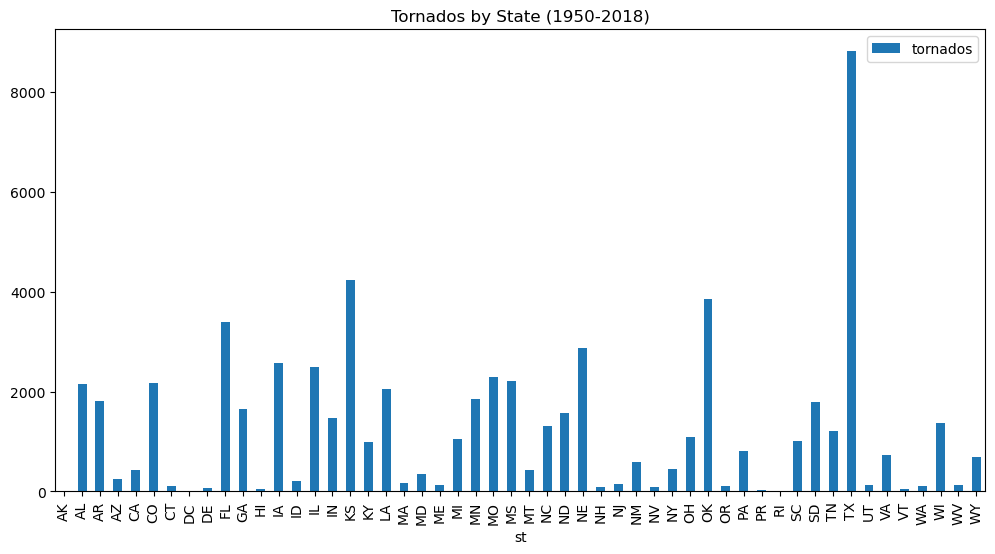

In [432]:
twisters_by_state.plot.bar(figsize=(12,6), title='Tornados by State (1950-2018)')

plt.show()

Notice that our sorting did not stick, this is because we did not reassign the DataFrame only output it to the screen.

We can chain in a call to `.sort_values()` to get our ordering to work in the plot.

I will also select the top 10 be adding `[:10]` which means "slice first 10 rows".

Now we can see our state labels a little better.

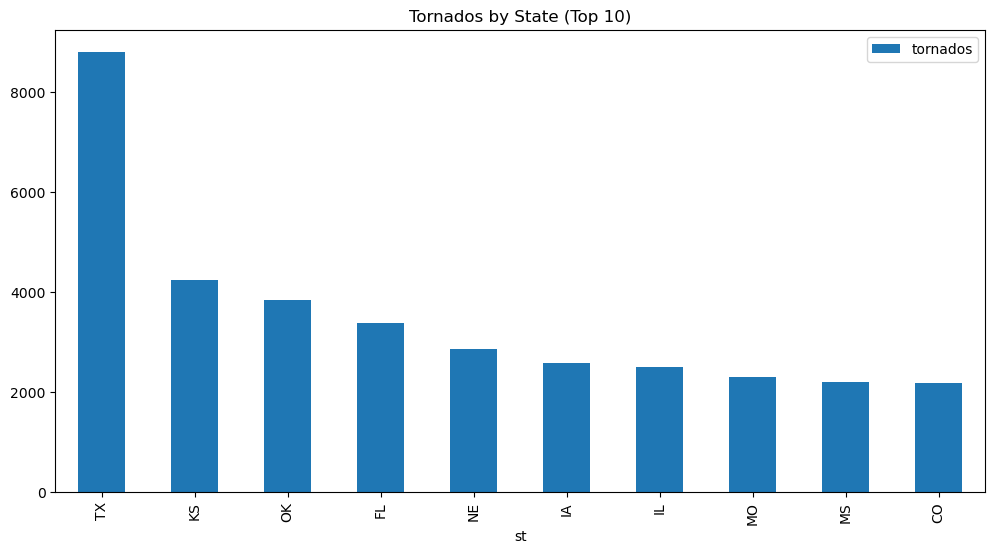

In [434]:
twisters_by_state.sort_values('tornados', ascending=False)[:10].plot.bar(figsize=(12,6), title='Tornados by State (Top 10)')

plt.show()

If we just want a list of the top 10 states we can do something like this.

In [436]:
top10 = twisters_by_state.sort_values('tornados', ascending=False)[:10].index
top10

Index(['TX', 'KS', 'OK', 'FL', 'NE', 'IA', 'IL', 'MO', 'MS', 'CO'], dtype='object', name='st')

### Plot tornados by state

Now that we know that Texas has had the most tornados lets subset our tornado dataset to only show ***Texas Twisters***.

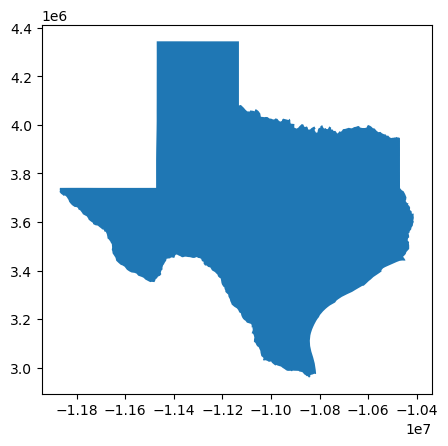

In [439]:
texas_map = states[states['NAME'] == 'Texas']
texas_map.plot()

plt.show()

In [440]:
texas_twisters = tornados[tornados['st'] == 'TX']

texas_twisters

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
6,7,1950,1,26,1950-01-26,18:00:00,3,TX,48,1,...,0.0,0.0,26.8800,-98.1200,26.8800,-98.0500,4.70,133,0,POINT (-10922668.437 3089173.889)
7,8,1950,2,11,1950-02-11,13:10:00,3,TX,48,2,...,4.0,0.0,29.4200,-95.2500,29.5200,-95.1300,9.90,400,0,POINT (-10603181.498 3408227.27)
8,9,1950,2,11,1950-02-11,13:50:00,3,TX,48,3,...,4.0,0.0,29.6700,-95.0500,29.8300,-95.0000,12.00,1000,0,POINT (-10580917.6 3440054.481)
9,10,1950,2,11,1950-02-11,21:00:00,3,TX,48,4,...,5.0,0.0,32.3500,-95.2000,32.4200,-95.2000,4.60,100,0,POINT (-10597615.524 3786480.059)
10,11,1950,2,11,1950-02-11,23:55:00,3,TX,48,5,...,5.0,0.0,32.9800,-94.6300,33.0000,-94.7000,4.50,67,0,POINT (-10534163.414 3869391.894)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63481,616861,2018,10,31,2018-10-31,20:54:00,3,TX,48,0,...,30000.0,0.0,29.1700,-95.4300,29.1700,-95.4300,0.08,30,0,POINT (-10623219.006 3376479.074)
63482,616862,2018,10,31,2018-10-31,20:57:00,3,TX,48,0,...,50000.0,0.0,29.8268,-94.8210,29.8268,-94.8210,0.38,100,0,POINT (-10555425.437 3460057.275)
63565,616945,2018,11,7,2018-11-07,14:00:00,3,TX,48,0,...,0.0,0.0,30.0200,-94.3400,30.0221,-94.3386,0.17,50,0,POINT (-10501880.761 3484747.23)
63637,617017,2018,12,26,2018-12-26,15:40:00,3,TX,48,0,...,30000.0,0.0,33.7772,-100.7792,33.7819,-100.7780,0.34,30,0,POINT (-11218689.227 3975169.719)


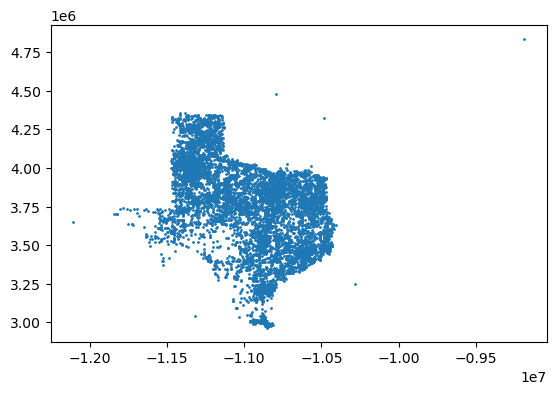

In [441]:
texas_twisters.plot(markersize=1)

plt.show()

Now that we have both of our DataFrames `texas_map` and `texas_twisters` lets overlay combine and plot them.

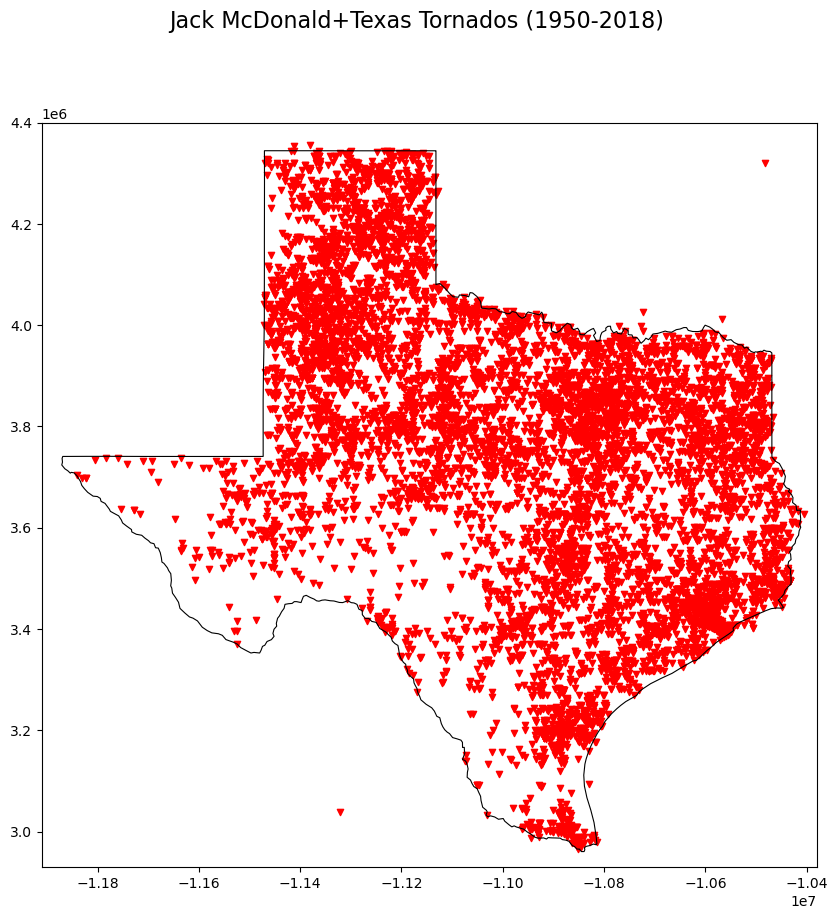

In [443]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(10,10)) 
ax = fig.add_subplot()

# Adjust bounding box to only Texas
# -119.00000, 29.30000, -103.80000, 44.00000

ax.set_xlim(-11910000, -10380000)
ax.set_ylim(2930000, 4400000)

fig.suptitle('Jack McDonald+Texas Tornados (1950-2018)', fontsize=16)

texas_map.boundary.plot(ax=ax, color='black', linewidth=.8)

texas_twisters.plot(ax=ax, color='red', marker='v', markersize=20)

plt.show()

Now lets move over to the path shapefile and see what we have to work with.

### Load the NOAA US tornado paths dataset 

In [446]:
tornado_paths = geopandas.read_file('zip://data/1950-2018-torn-aspath.zip!1950-2018-torn-aspath')

In [447]:
tornado_paths.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.0,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,"LINESTRING (-90.22 38.77, -90.03 38.83)"
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,5.0,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,"LINESTRING (-89.3 39.1, -89.23 39.12)"
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,4.0,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,"LINESTRING (-84.58 40.88, -84.5799 40.8801)"
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,3.0,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,"LINESTRING (-94.37 34.4, -94.3699 34.4001)"
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,5.0,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,"LINESTRING (-90.68 37.6, -90.65 37.63)"


Reproject to Mercator

In [449]:
tornado_paths = tornado_paths.to_crs("EPSG:3395")

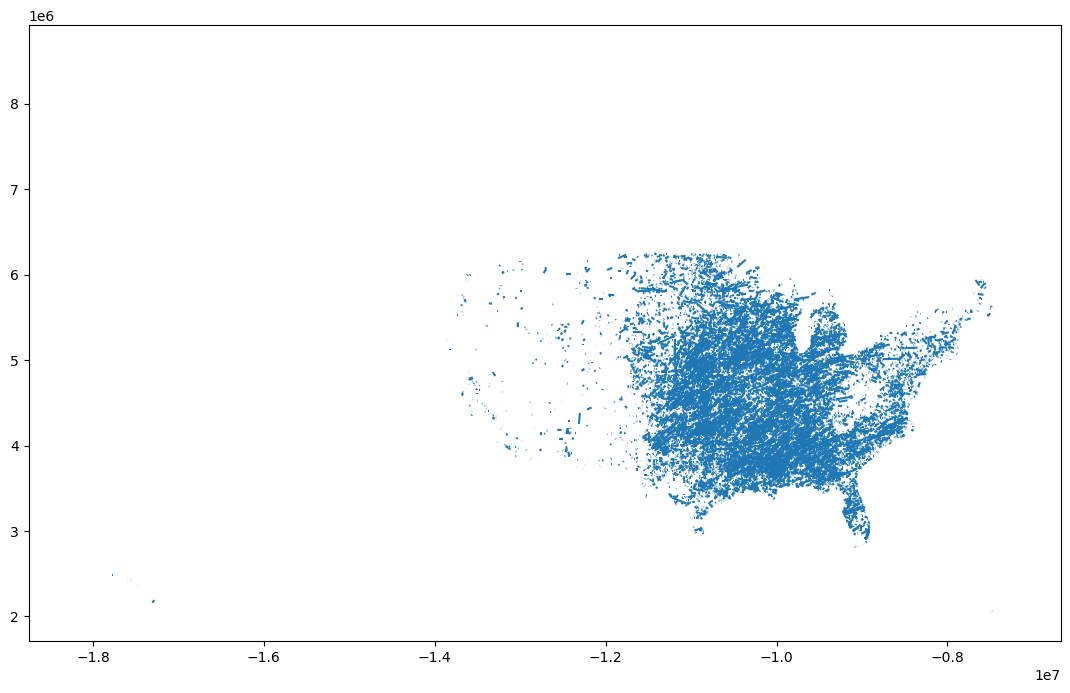

In [450]:
tornado_paths.plot(figsize=(14,8))

plt.show()

In [451]:
texas_twister_paths = tornado_paths[tornado_paths['st'] == 'TX']
texas_twister_paths.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
6,7,1950,1,26,1950-01-26,18:00:00,3,TX,48,1,...,0.0,0.0,26.88,-98.12,26.88,-98.05,4.7,133,0,"LINESTRING (-10922668.437 3089173.889, -109148..."
7,8,1950,2,11,1950-02-11,13:10:00,3,TX,48,2,...,4.0,0.0,29.42,-95.25,29.52,-95.13,9.9,400,0,"LINESTRING (-10603181.498 3408227.27, -1058982..."
8,9,1950,2,11,1950-02-11,13:50:00,3,TX,48,3,...,4.0,0.0,29.67,-95.05,29.83,-95.00,12.0,1000,0,"LINESTRING (-10580917.6 3440054.481, -10575351..."
9,10,1950,2,11,1950-02-11,21:00:00,3,TX,48,4,...,5.0,0.0,32.35,-95.20,32.42,-95.20,4.6,100,0,"LINESTRING (-10597615.524 3786480.059, -105976..."
10,11,1950,2,11,1950-02-11,23:55:00,3,TX,48,5,...,5.0,0.0,32.98,-94.63,33.00,-94.70,4.5,67,0,"LINESTRING (-10534163.414 3869391.894, -105419..."


### Plot tornado points and paths for Texas

Now that we have our tornado paths DataFrame narrowed down to Texas lets plot the paths.

For this next map I will plot the start point of each Tornado as pink and the path data as Red.

As you can see, path data does not exist for all recorded tornados.

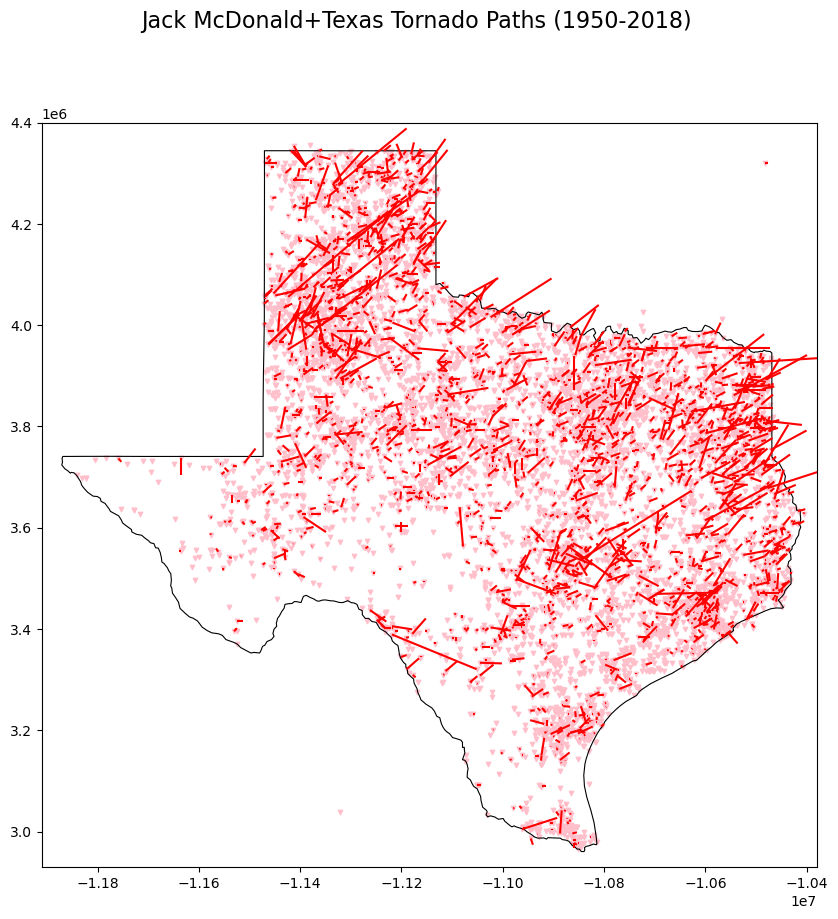

In [454]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(10,10)) 
ax = fig.add_subplot()

# Adjust bounding box to only Texas
# -119.00000, 29.30000, -103.80000, 44.00000

ax.set_xlim(-11910000, -10380000)
ax.set_ylim(2930000, 4400000)

fig.suptitle('Jack McDonald+Texas Tornado Paths (1950-2018)', fontsize=16)

texas_map.boundary.plot(ax=ax, color='black', linewidth=.8)
texas_twisters.plot(ax=ax, color='pink', marker='v', markersize=10)
texas_twister_paths.plot(ax=ax, color='red')

plt.show()

### Color coded tornados by year

In this variation of the Texas tornado map we are color coding the tornado markers and paths by year with a colormap file.  To do this we add the parameter `column='yr'` to the call to `plot()`.

The colormap used `cmap='coolwarm'` allows us to see older tornado records as cool blue colors and more recent tornados as warm red colors.  Note that we also removed the `color` parameter as cmap and color cannot be used simultaneously.

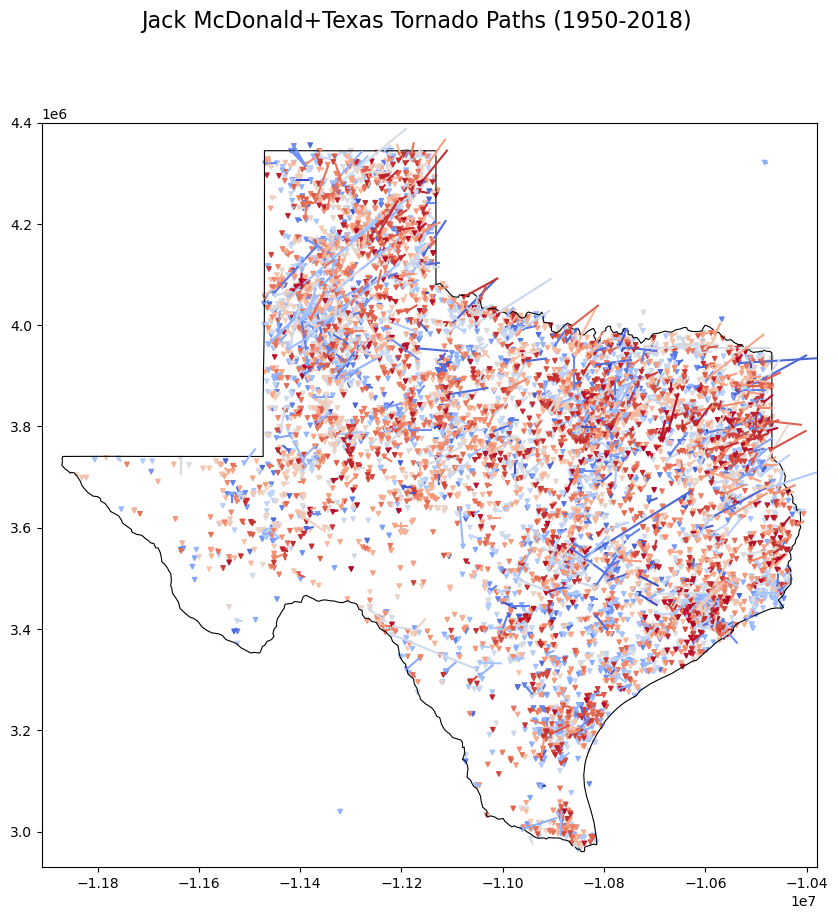

In [457]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(10,10)) 
ax = fig.add_subplot()

# Adjust bounding box to only Texas
# -119.00000, 29.30000, -103.80000, 44.00000

ax.set_xlim(-11910000, -10380000)
ax.set_ylim(2930000, 4400000)

fig.suptitle('Jack McDonald+Texas Tornado Paths (1950-2018)', fontsize=16)

texas_map.boundary.plot(ax=ax, color='black', linewidth=.8)
texas_twisters.plot(ax=ax, column='yr', cmap="coolwarm", marker='v', markersize=10)
texas_twister_paths.plot(ax=ax, column='yr', cmap="coolwarm")

plt.show()

Congratulations, you are well on your way to becoming a GIS expert with `geopandas`. 